Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))

In [2]:
customer_df = pd.read_csv(r'C:\Users\Win10\Downloads\we_fn_use_c_marketing_customer_value_analysis.csv')

First, look at its main features (head, shape, info).

In [5]:
# Ver las primeras filas del DataFrame
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# Ver la forma del DataFrame
customer_df.shape


(9134, 24)

In [7]:
# Ver la información general del DataFrame
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Rename the columns so they follow the PE8 (snake case).

In [8]:
# Renombrar las columnas a snake_case
customer_df.columns = [col.lower().replace(' ', '_') for col in customer_df.columns]
customer_df.columns


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.

In [9]:
# Cambiar las columnas necesarias a tipos categóricos
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Convertir otras columnas que deberían ser categóricas
categorical_columns = ['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 
                       'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 
                       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']
for col in categorical_columns:
    customer_df[col] = customer_df[col].astype('category')
customer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   category      
 1   state                          9134 non-null   category      
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   category      
 4   coverage                       9134 non-null   category      
 5   education                      9134 non-null   category      
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   category      
 8   gender                         9134 non-null   category      
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   category      
 11  marital_status   

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_33352\3203277601.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


Plot a correlation matrix, and comment on what you observe.

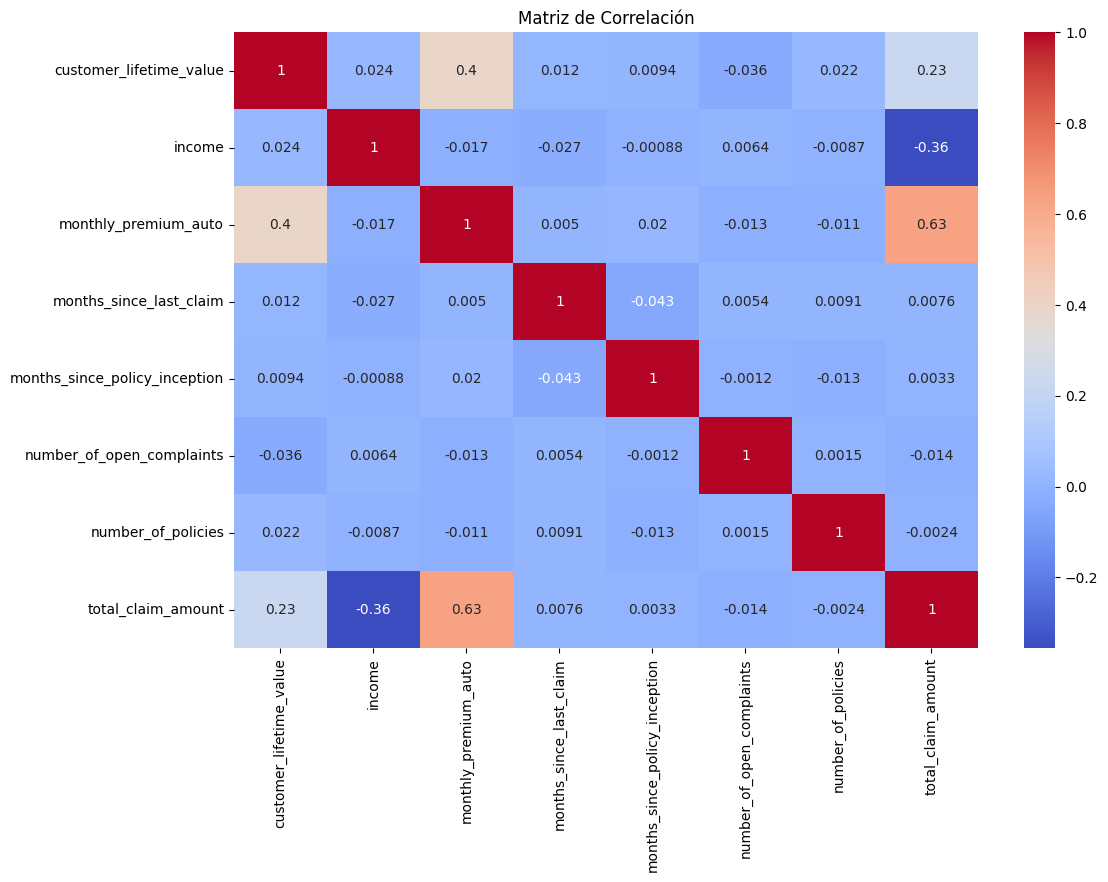

In [13]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
numeric_df = customer_df.select_dtypes(include=[np.number])

# Plotear la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()




Algunas correlaciones importantes pueden ser:

Customer Lifetime Value y Total Claim Amount: alta correlación, sugiere que el valor de vida del cliente está relacionado con la cantidad total de reclamaciones.
Monthly Premium Auto y Total Claim Amount: Puede mostrar cómo las primas mensuales del seguro están relacionadas con las reclamaciones totales.
Income y otras variables: Pueden proporcionar información sobre cómo los ingresos de los clientes afectan otras métricas.

Plot every continuous variable. Comment what you can see in the plots.

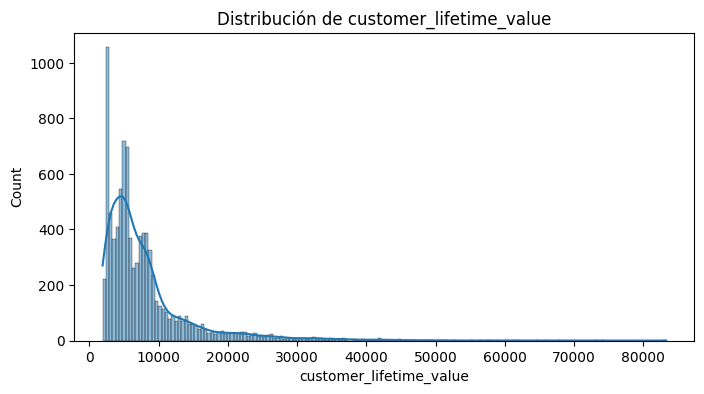

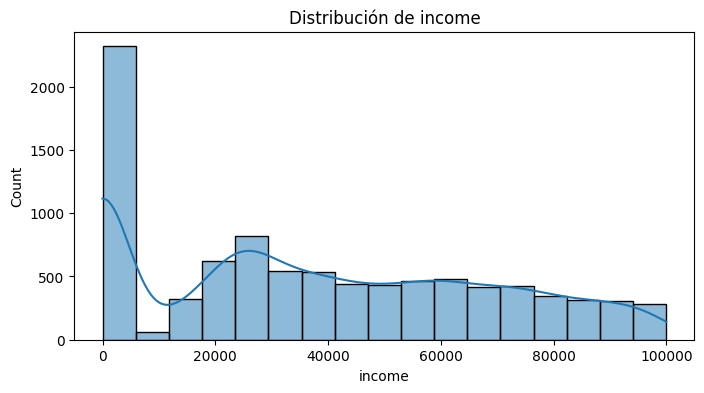

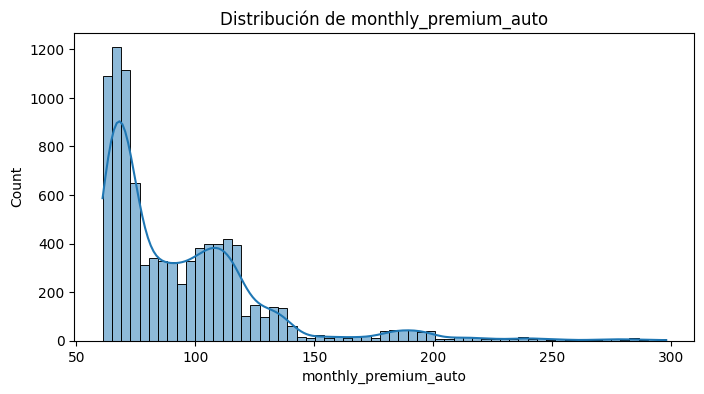

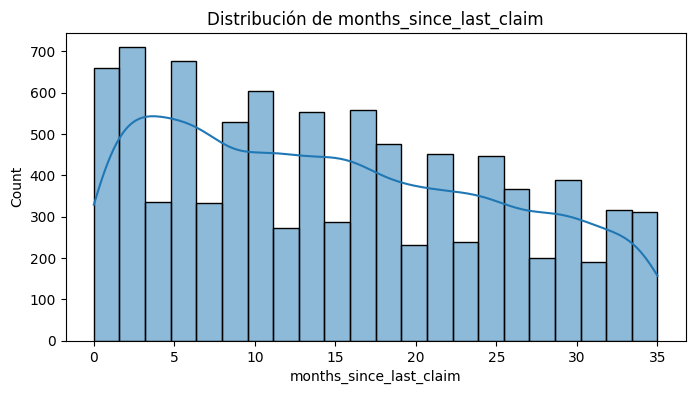

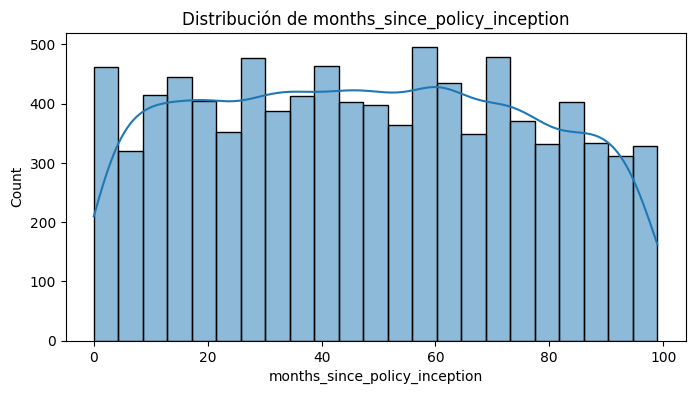

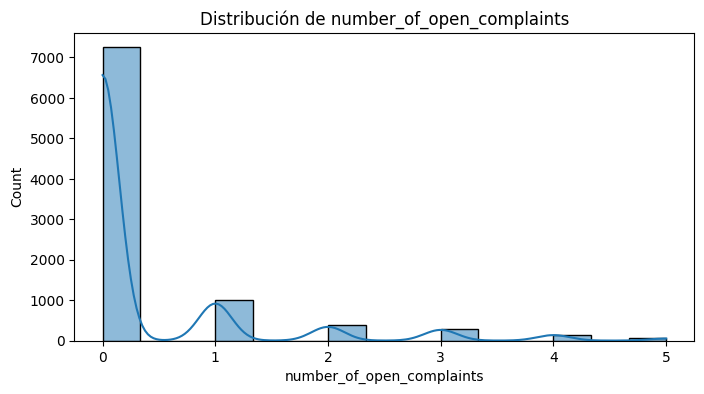

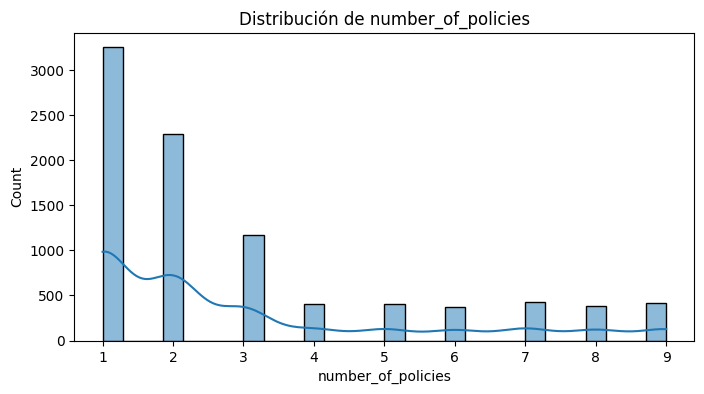

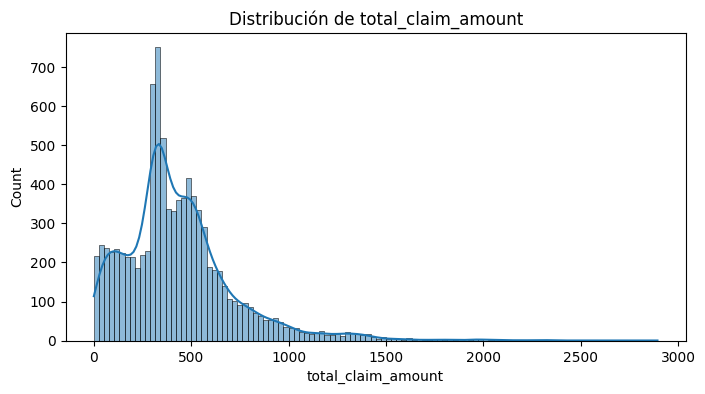

In [14]:
# Identificar variables continuas
continuous_columns = customer_df.select_dtypes(include=['float64', 'int64']).columns

# Plotear variables continuas
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(customer_df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()


Cada gráfico de distribución (histograma) muestra cómo se distribuyen los valores de una variable continua específica. Las distribuciones pueden ser normales, sesgadas a la izquierda o derecha, multimodales, etc. Estos patrones pueden proporcionar información sobre la tendencia central, la dispersión y la forma de la distribución de los datos.

Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

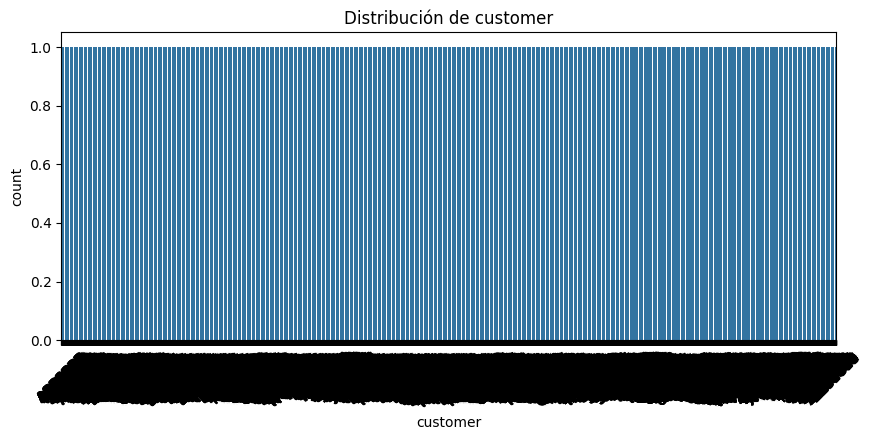

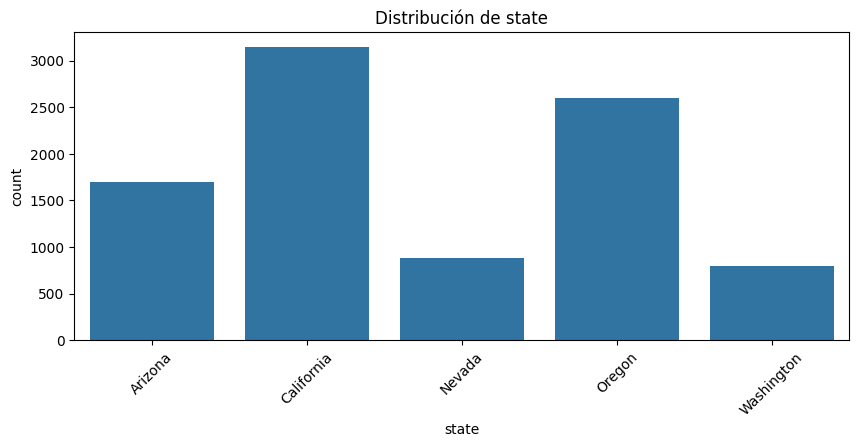

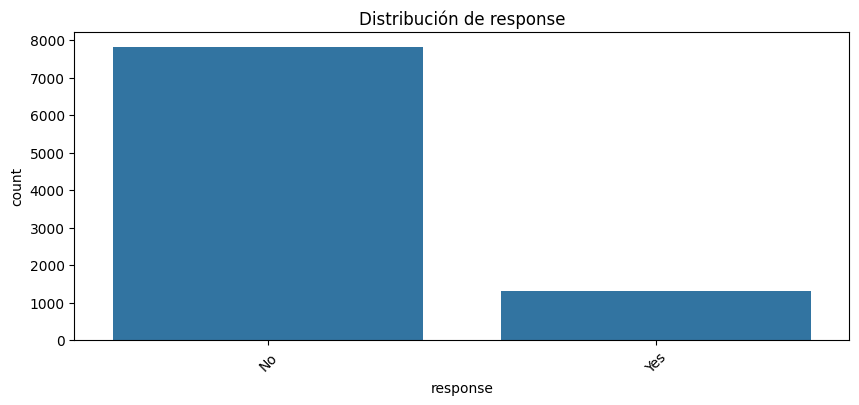

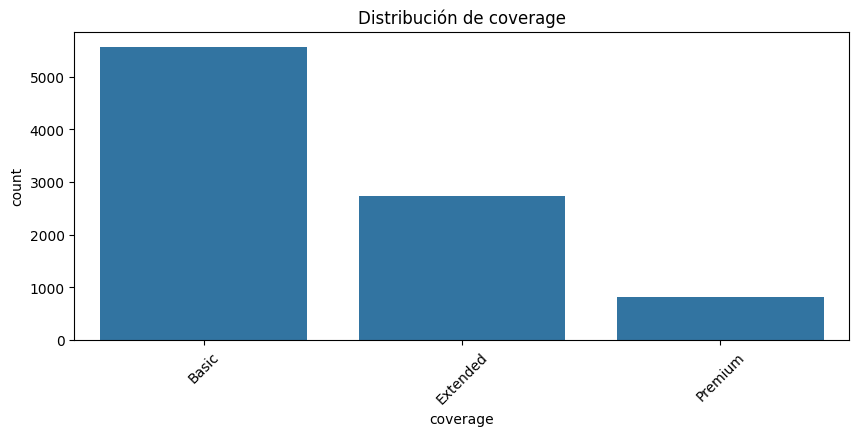

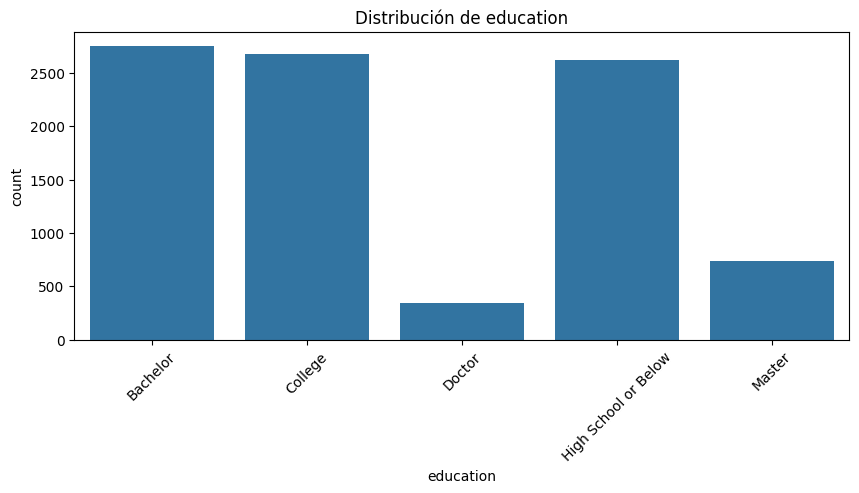

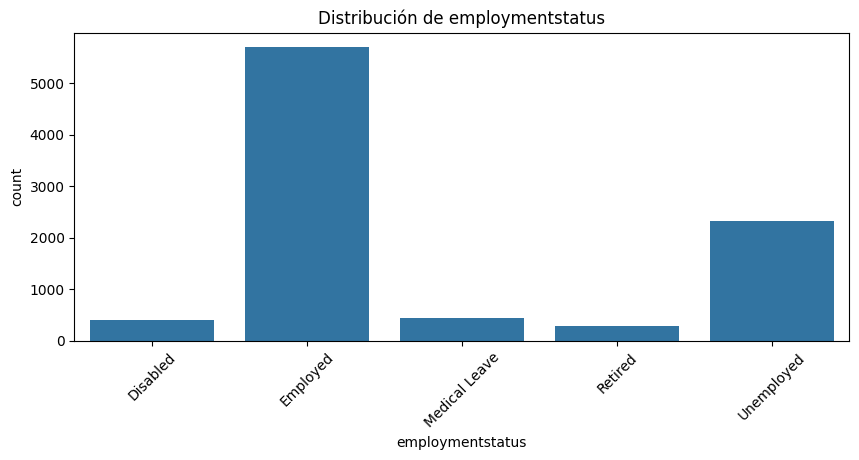

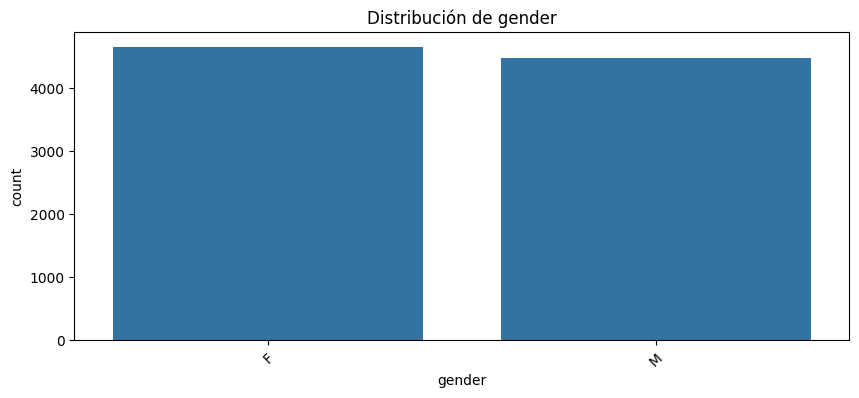

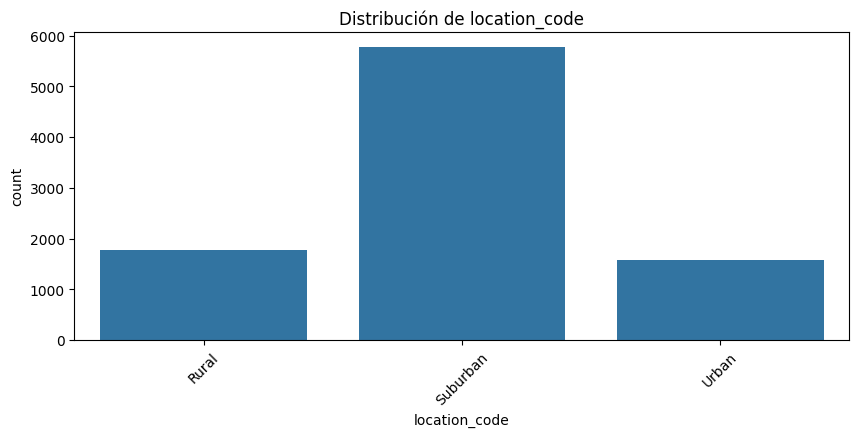

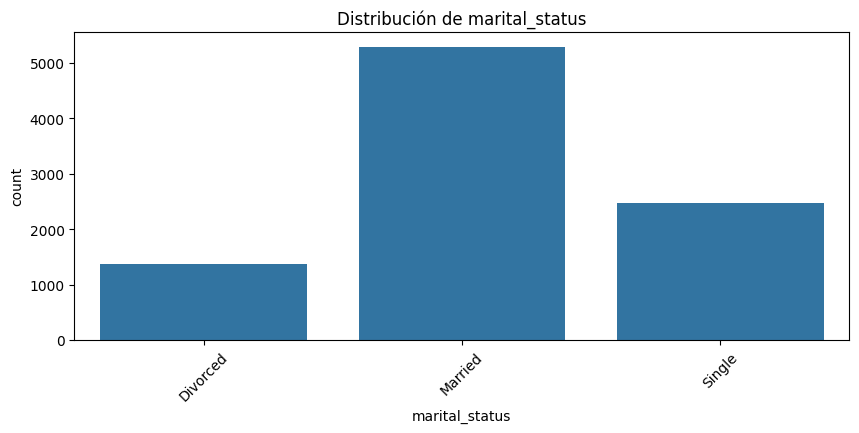

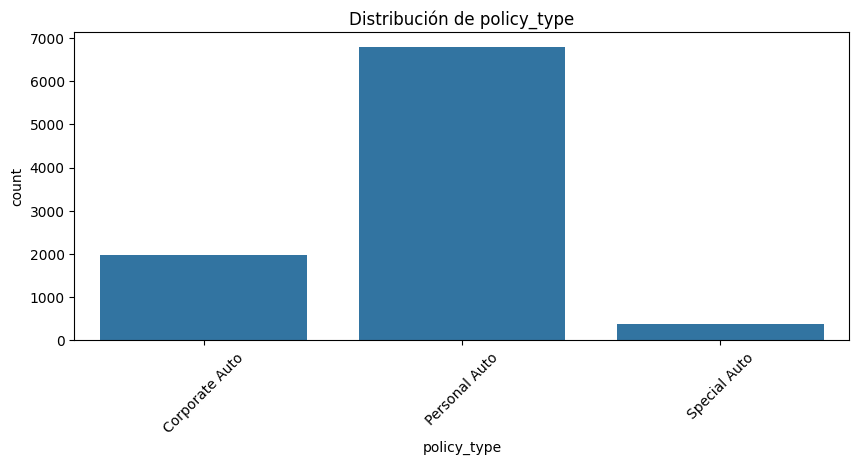

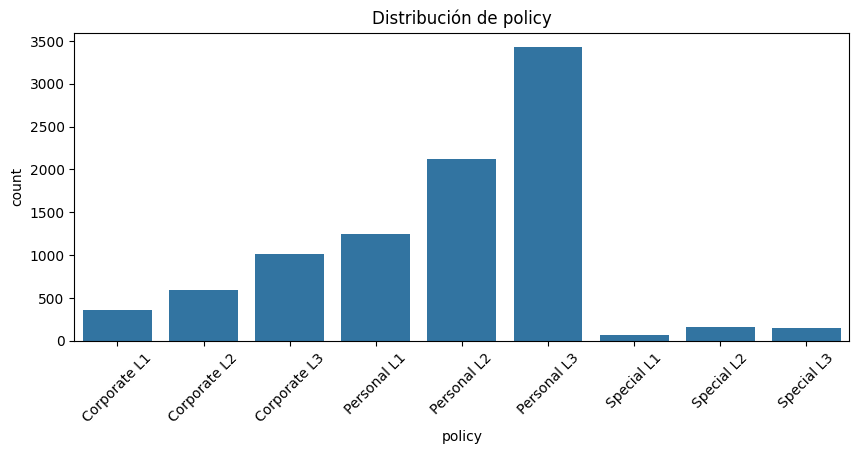

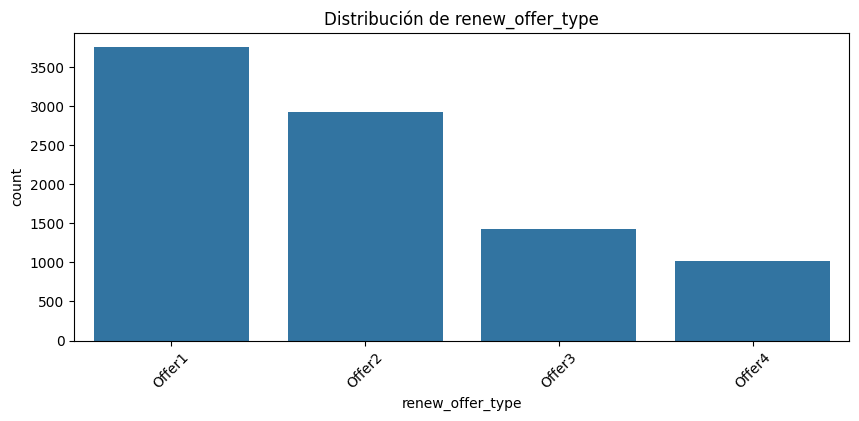

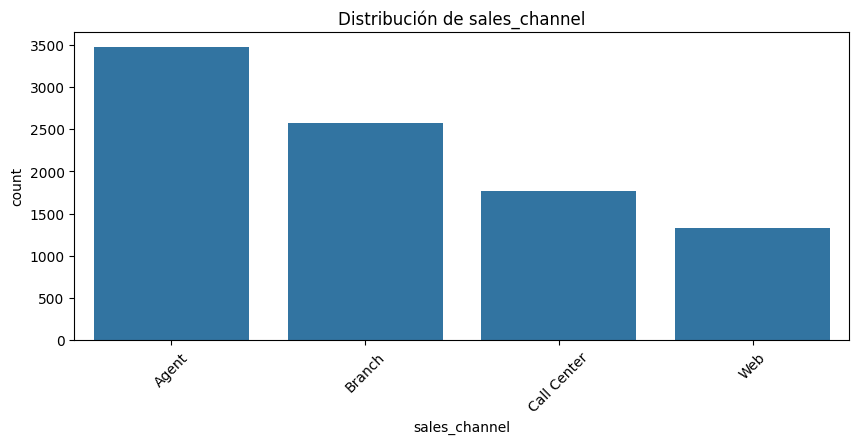

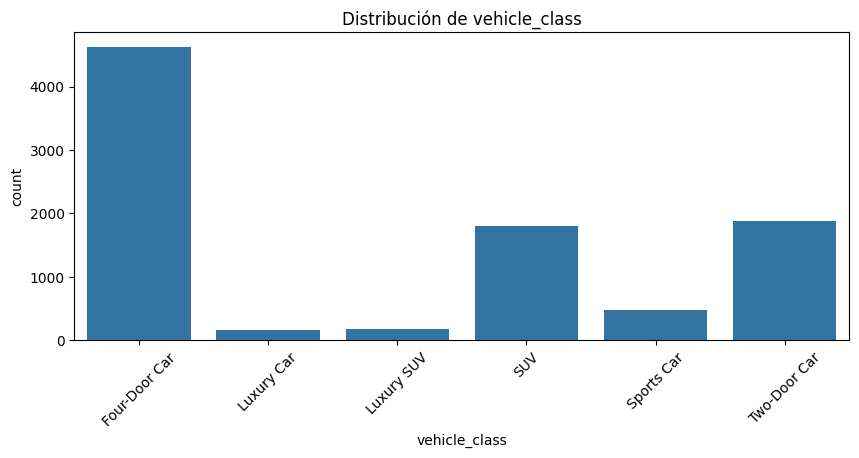

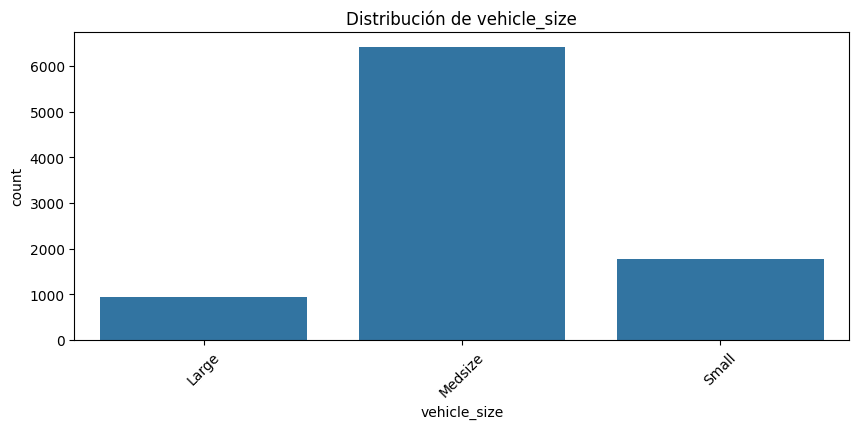

In [15]:
# Identificar variables categóricas
categorical_columns = customer_df.select_dtypes(include=['category']).columns

# Plotear variables categóricas
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=customer_df)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

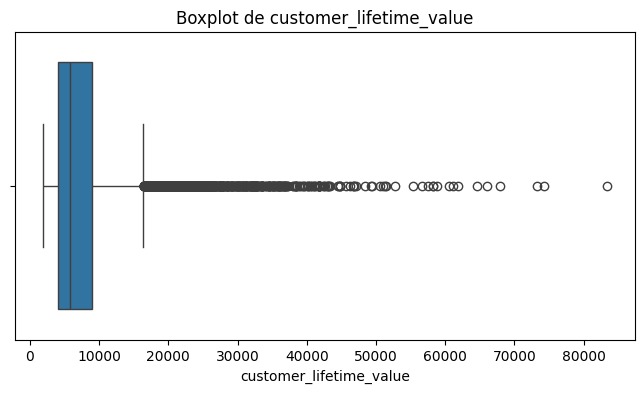

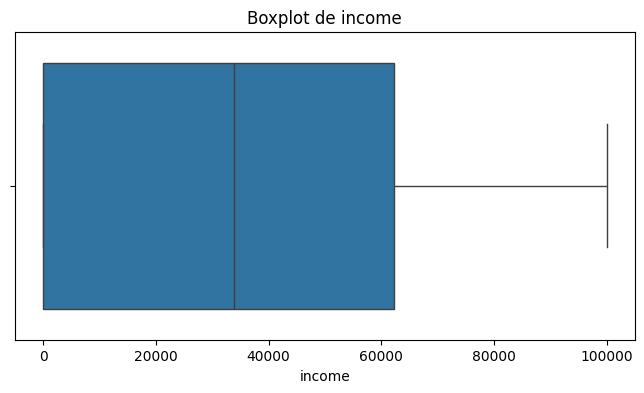

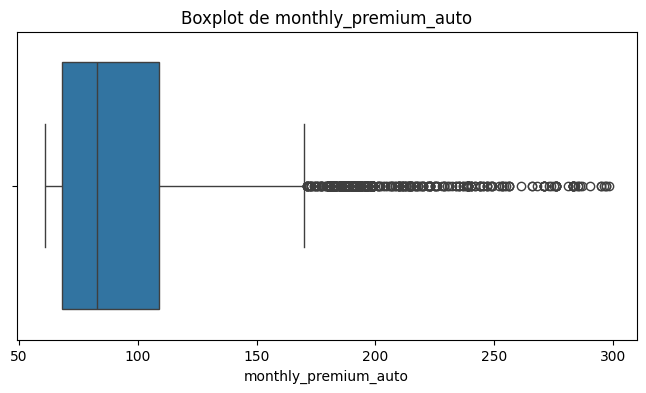

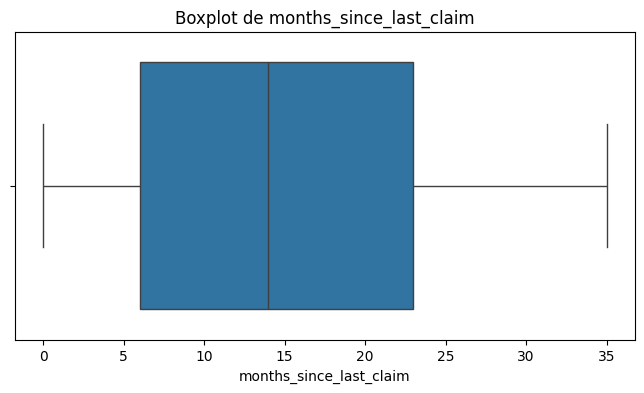

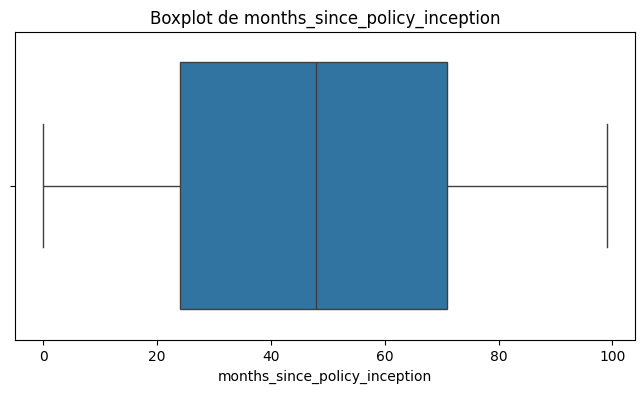

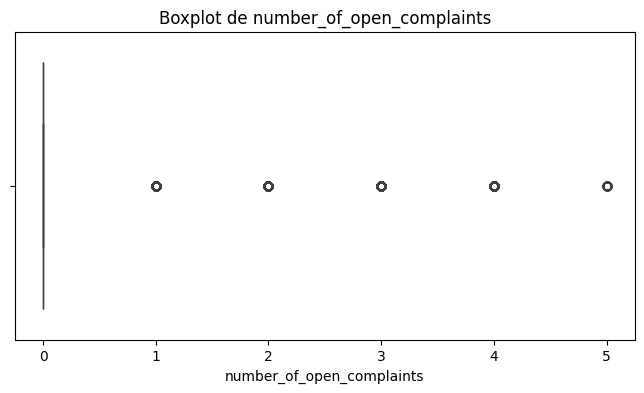

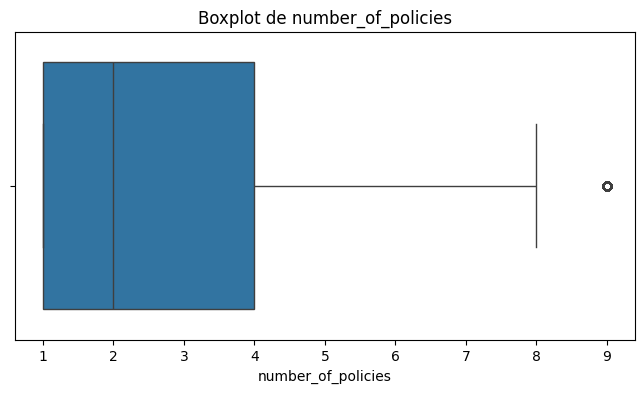

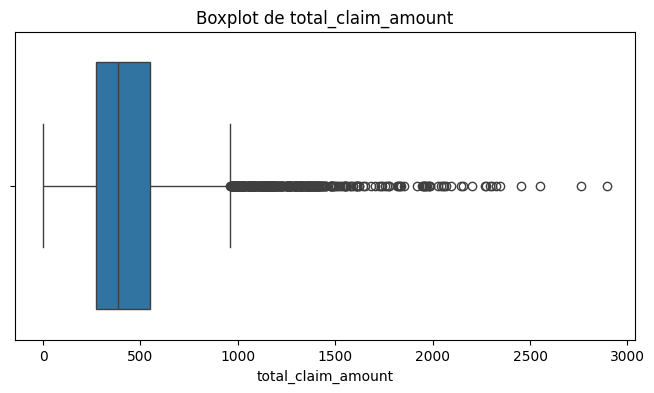

In [16]:
# Buscar outliers usando boxplots
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=customer_df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


A partir de los boxplots, observo que existen algunos outliers en las variables continuas:

Customer Lifetime Value
Total Claim Amount
Income

Los eliminaría para limpiar el dataframe.

Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [17]:
# Verificar NaN en todas las columnas
nan_values = customer_df.isna().sum()
nan_values




customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64